In [10]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
import seaborn as sns
import cmcrameri.cm as cmc

from eggman.grid import luminosity, log_surface_gravity, calculate_eep

In [2]:
filename = "/mnt/data-storage/yaguangli2023/stellar-models/grid_models_surface_effect_uncorrected/grid.h5"
tracks = pd.read_hdf(filename, "tracks")
tracks.head()

star_mass     Yinit     Zinit      amlt  fov_core  fov_shell
track                                                              
7000     0.92329  0.279311  0.001829  1.608258  0.000000   0.006041
7001     1.72329  0.229311  0.010871  2.308258  0.012396   0.006041
7002     2.12329  0.304311  0.004172  2.658258  0.015861   0.006041
7003     1.32329  0.254311  0.024469  1.958258  0.002481   0.006041
7004     1.12329  0.291811  0.006519  2.133258  0.000000   0.006041

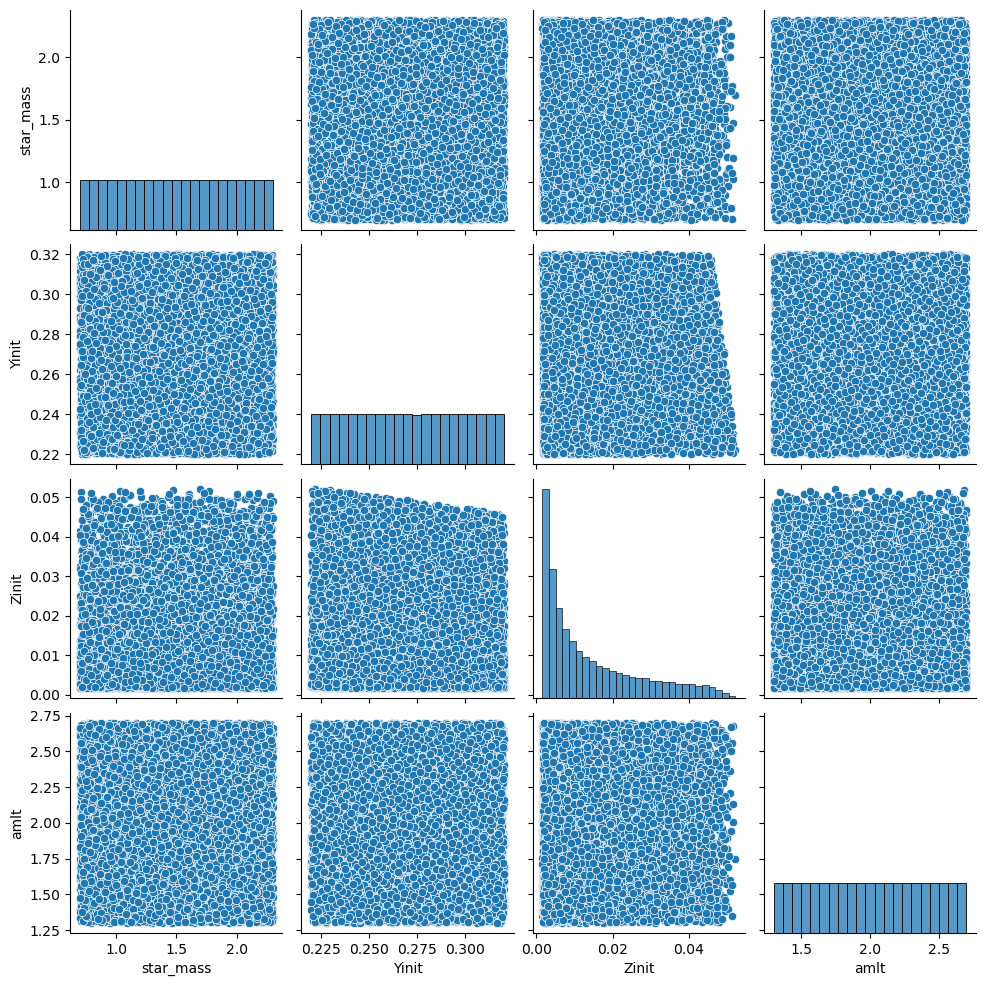

In [3]:
vars = ["star_mass", "Yinit", "Zinit", "amlt"]
sns.pairplot(tracks, vars=vars);

In [4]:
stars = pd.read_hdf(filename, "stars")
stars.head()

star_age    radius         Teff  center_h1    log_LHe  \
track star                                                              
7000  1     2.220454e+07  0.893151  6382.509287   0.718192 -45.291905   
      2     2.300916e+07  0.891027  6377.312552   0.718122 -45.308912   
      3     2.397470e+07  0.890320  6373.785487   0.718037 -45.328570   
      4     3.019433e+07  0.893682  6371.412400   0.717474 -45.392646   
      5     3.259691e+07  0.894573  6371.453759   0.717253 -45.402736   

            log_Lnuc  Dnu_freq_o     eps_o  delta_Pg  
track star                                            
7000  1     0.078416  148.565794  1.129515       0.0  
      2     0.077135  149.148739  1.131800       0.0  
      3     0.075916  149.362908  1.132830       0.0  
      4     0.075178  148.552167  1.130613       0.0  
      5     0.075810  148.331713  1.129892       0.0

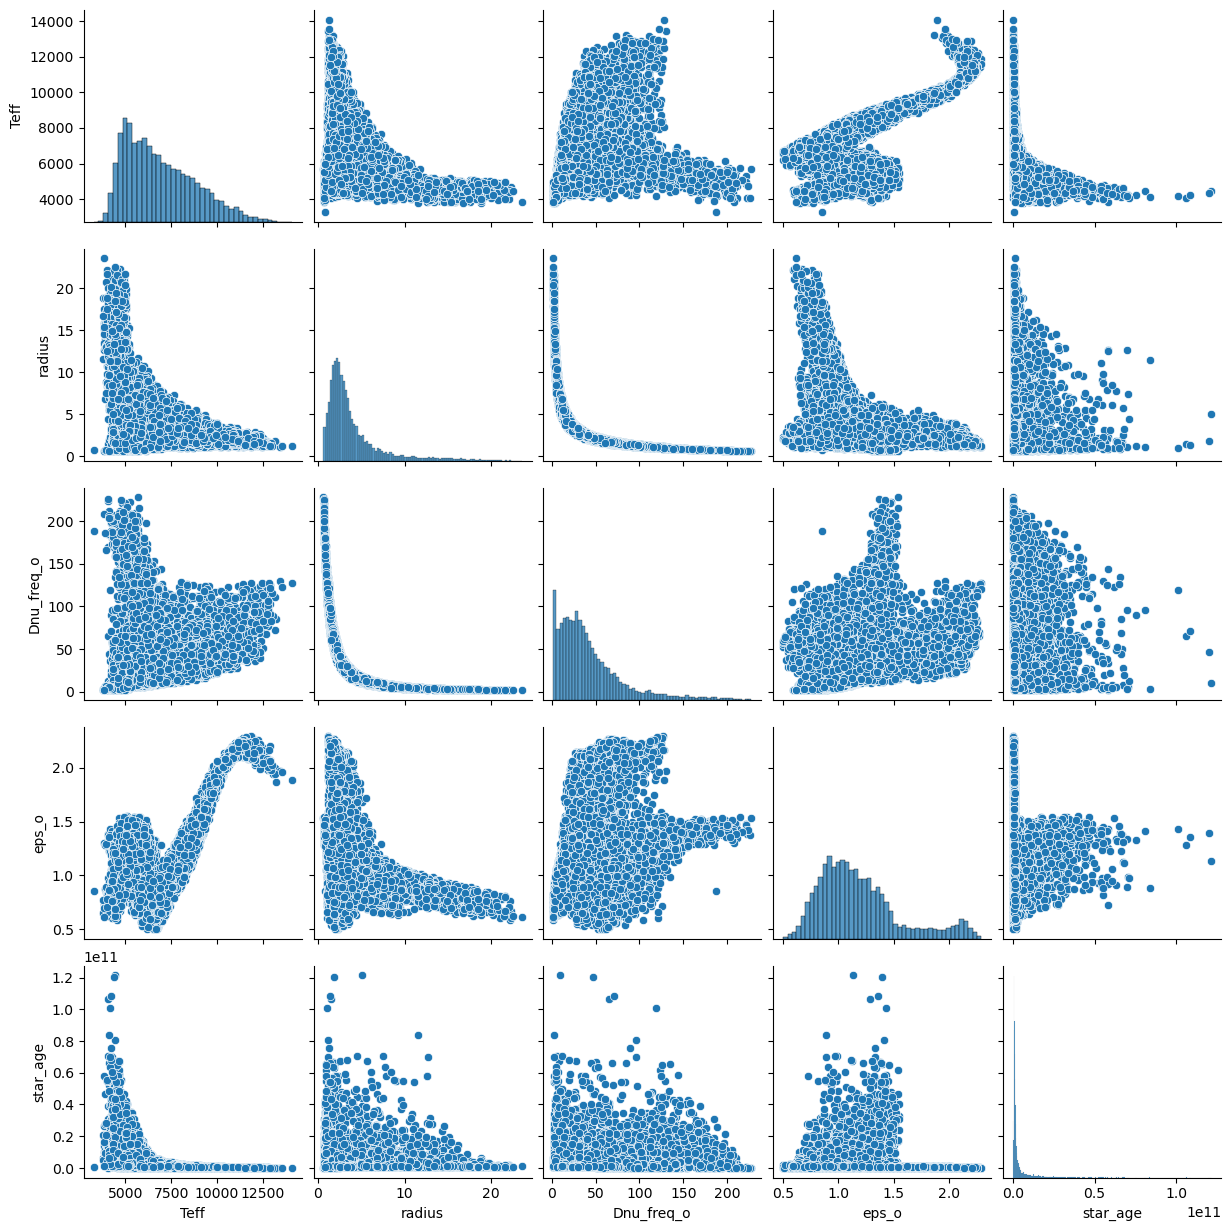

In [5]:
num_samples = 10000
vars = ["Teff", "radius", "Dnu_freq_o", "eps_o", "star_age"]
sns.pairplot(stars.sample(num_samples), vars=vars);

In [6]:
grid = tracks.join(stars).reset_index()
grid.head()

track  star  star_mass     Yinit     Zinit      amlt  fov_core  fov_shell  \
0   7000     1    0.92329  0.279311  0.001829  1.608258       0.0   0.006041   
1   7000     2    0.92329  0.279311  0.001829  1.608258       0.0   0.006041   
2   7000     3    0.92329  0.279311  0.001829  1.608258       0.0   0.006041   
3   7000     4    0.92329  0.279311  0.001829  1.608258       0.0   0.006041   
4   7000     5    0.92329  0.279311  0.001829  1.608258       0.0   0.006041   

       star_age    radius         Teff  center_h1    log_LHe  log_Lnuc  \
0  2.220454e+07  0.893151  6382.509287   0.718192 -45.291905  0.078416   
1  2.300916e+07  0.891027  6377.312552   0.718122 -45.308912  0.077135   
2  2.397470e+07  0.890320  6373.785487   0.718037 -45.328570  0.075916   
3  3.019433e+07  0.893682  6371.412400   0.717474 -45.392646  0.075178   
4  3.259691e+07  0.894573  6371.453759   0.717253 -45.402736  0.075810   

   Dnu_freq_o     eps_o  delta_Pg  
0  148.565794  1.129515       0.0  
1  149.148739  1.131800       0.0  
2  149.362908  1.132830       0.0  
3  148.552167  1.130613       0.0  
4  148.331713  1.129892       0.0

In [8]:
grid["luminosity"] = luminosity(grid)
grid["log_g"] = log_surface_gravity(grid)

grid["log_Zinit"] = np.log10(grid.Zinit)
grid["log_age"] = np.log10(grid.star_age)
grid["log_Dnu"] = np.log10(grid.Dnu_freq_o)
grid["log_R"] = np.log10(grid.radius)
grid["log_Teff"] = np.log10(grid.Teff)

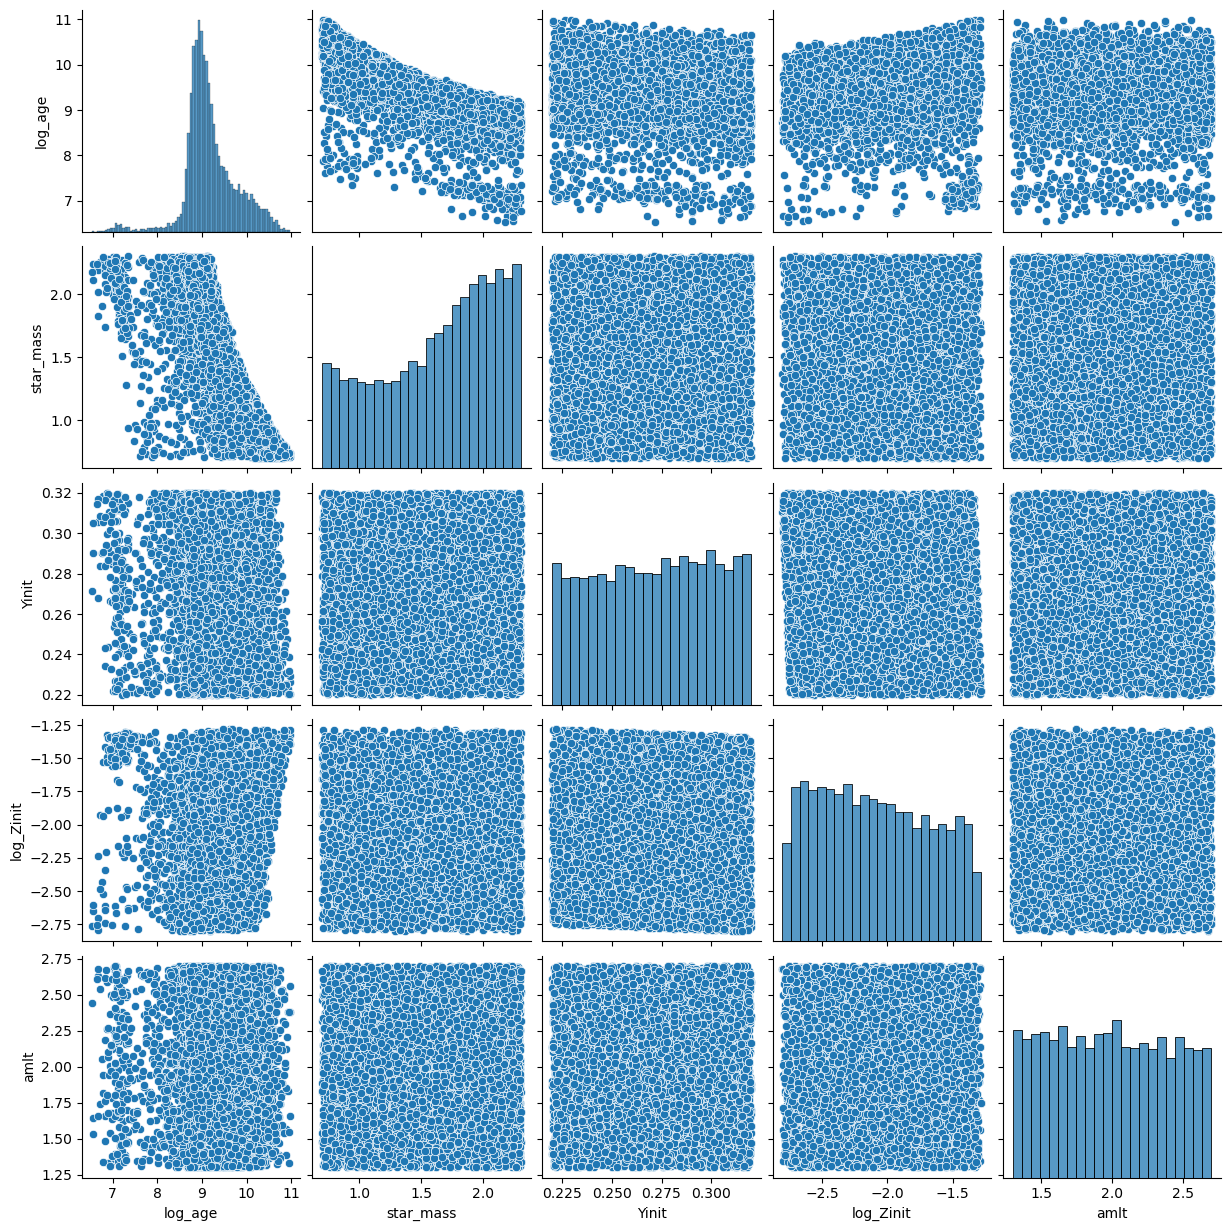

In [9]:
num_samples = 10000
vars = ["log_age", "star_mass", "Yinit", "log_Zinit", "amlt"]
sns.pairplot(grid.sample(num_samples), vars=vars);

There is a distribution of young pre-MS stars. We can calculate evol phase to drop these.

In [11]:
grid["phase"], _ = calculate_eep(grid)
grid.head()

track  star  star_mass     Yinit     Zinit      amlt  fov_core  fov_shell  \
0   7000     1    0.92329  0.279311  0.001829  1.608258       0.0   0.006041   
1   7000     2    0.92329  0.279311  0.001829  1.608258       0.0   0.006041   
2   7000     3    0.92329  0.279311  0.001829  1.608258       0.0   0.006041   
3   7000     4    0.92329  0.279311  0.001829  1.608258       0.0   0.006041   
4   7000     5    0.92329  0.279311  0.001829  1.608258       0.0   0.006041   

       star_age    radius  ...  luminosity     log_g  log_Zinit   log_age  \
0  2.220454e+07  0.893151  ...    1.192639  4.501556  -2.737812  7.346442   
1  2.300916e+07  0.891027  ...    1.183114  4.503624  -2.737812  7.361901   
2  2.397470e+07  0.890320  ...    1.178625  4.504313  -2.737812  7.379753   
3  3.019433e+07  0.893682  ...    1.185776  4.501040  -2.737812  7.479925   
4  3.259691e+07  0.894573  ...    1.188172  4.500174  -2.737812  7.513176   

    log_Dnu     log_R  log_Teff   delta_X     f_nuc  phase  
0  2.171919 -0.049075  3.804991  0.000668  1.004400     -1  
1  2.173620 -0.050109  3.804638  0.000738  1.009506     -1  
2  2.174243 -0.050454  3.804397  0.000823  1.010508     -1  
3  2.171879 -0.048817  3.804236  0.001386  1.002710     -1  
4  2.171234 -0.048384  3.804239  0.001608  1.002145      0  

[5 rows x 27 columns]

In [12]:
grid = grid.loc[grid.phase > -1]
grid.head()

track  star  star_mass     Yinit     Zinit      amlt  fov_core  fov_shell  \
4   7000     5    0.92329  0.279311  0.001829  1.608258       0.0   0.006041   
5   7000     6    0.92329  0.279311  0.001829  1.608258       0.0   0.006041   
6   7000     7    0.92329  0.279311  0.001829  1.608258       0.0   0.006041   
7   7000     8    0.92329  0.279311  0.001829  1.608258       0.0   0.006041   
8   7000     9    0.92329  0.279311  0.001829  1.608258       0.0   0.006041   

       star_age    radius  ...  luminosity     log_g  log_Zinit   log_age  \
4  3.259691e+07  0.894573  ...    1.188172  4.500174  -2.737812  7.513176   
5  3.548000e+07  0.895385  ...    1.190286  4.499387  -2.737812  7.549984   
6  4.309136e+07  0.896934  ...    1.194146  4.497885  -2.737812  7.634390   
7  5.405171e+07  0.898494  ...    1.198007  4.496376  -2.737812  7.732809   
8  6.983463e+07  0.900101  ...    1.202220  4.494823  -2.737812  7.844071   

    log_Dnu     log_R  log_Teff   delta_X     f_nuc  phase  
4  2.171234 -0.048384  3.804239  0.001608  1.002145      0  
5  2.170650 -0.047990  3.804235  0.001875  1.001741      0  
6  2.169543 -0.047240  3.804211  0.002592  1.001313      0  
7  2.168433 -0.046485  3.804184  0.003644  1.000889      0  
8  2.167280 -0.045709  3.804177  0.005195  1.000489      0  

[5 rows x 27 columns]

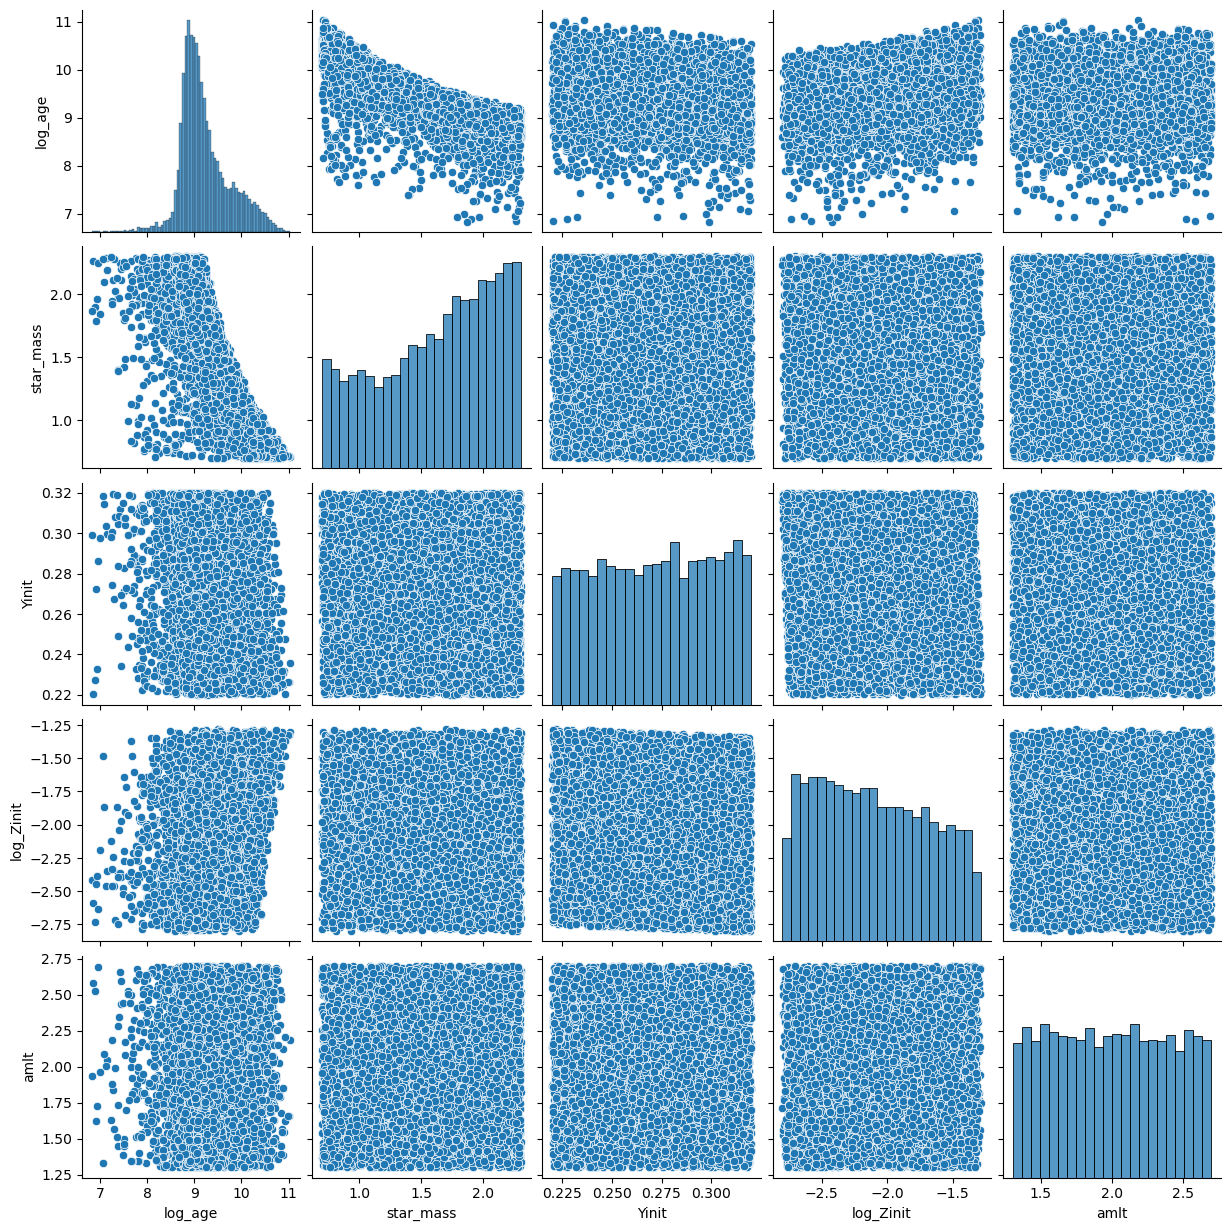

In [13]:
num_samples = 10000
vars = ["log_age", "star_mass", "Yinit", "log_Zinit", "amlt"]
sns.pairplot(grid.sample(num_samples), vars=vars);

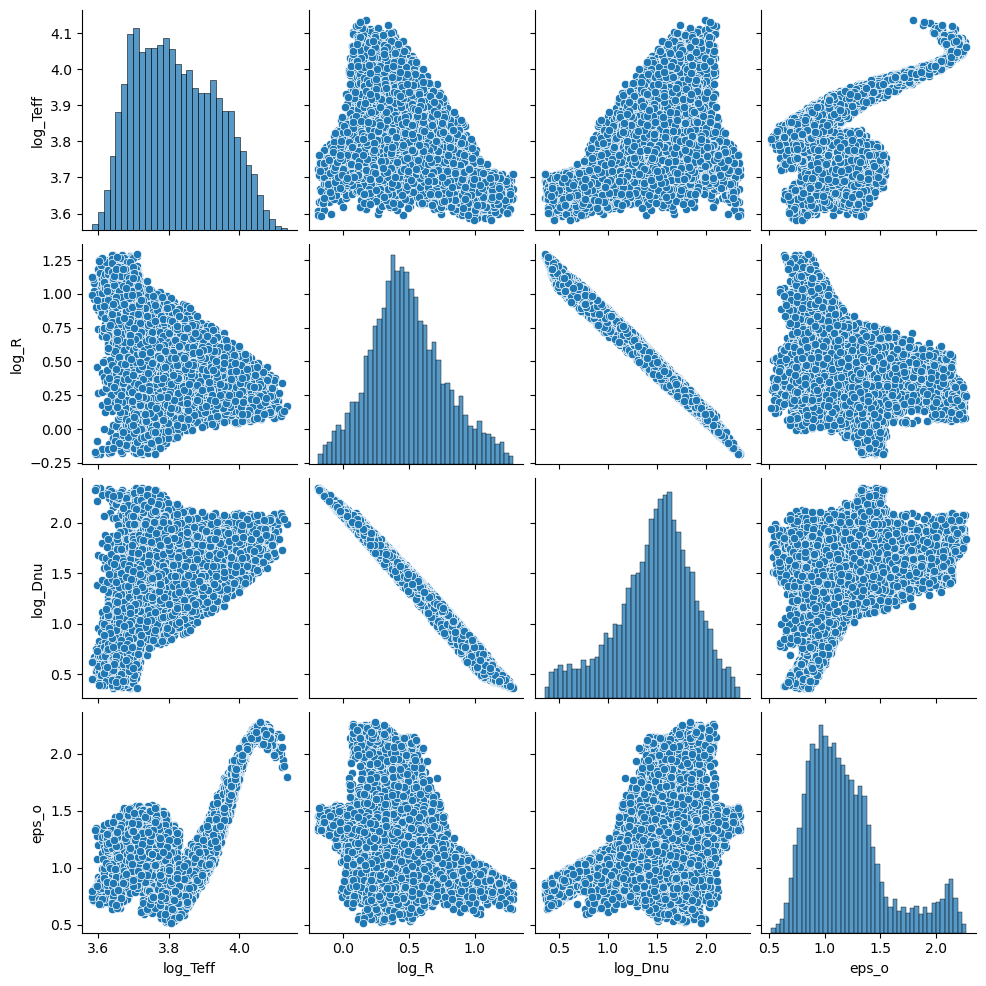

In [15]:
num_samples = 10000
vars = ["log_Teff", "log_R", "log_Dnu", "eps_o"]
sns.pairplot(grid.sample(num_samples), vars=vars);

In [16]:
ts = grid.track.sample(50)
mask = grid.track.isin(ts)

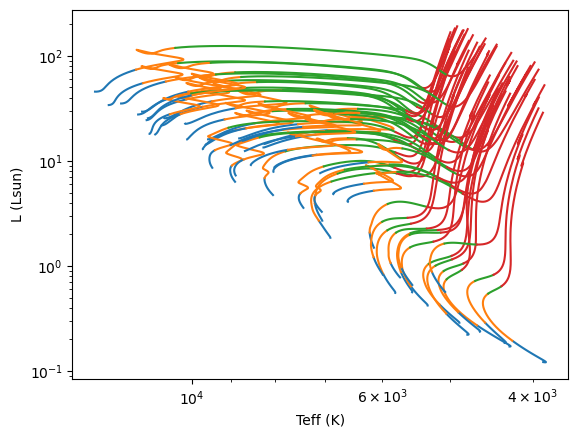

In [21]:
fig, ax = plt.subplots()

for idx, group in grid.loc[mask].groupby(["track", "phase"], sort=False):
    label = None
    c = f"C{idx[1]}"
    ax = group.plot(x="Teff", y="luminosity", c=c, ax=ax, label=label)
#     ax.text(group.Teff.iloc[0], group.luminosity.iloc[0], idx[0])

ax.invert_xaxis()
# ax.invert_yaxis()
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Teff (K)")
ax.set_ylabel("L (Lsun)")
# ax.legend(title="M, Yinit, Zinit, amlt")
ax.get_legend().remove()

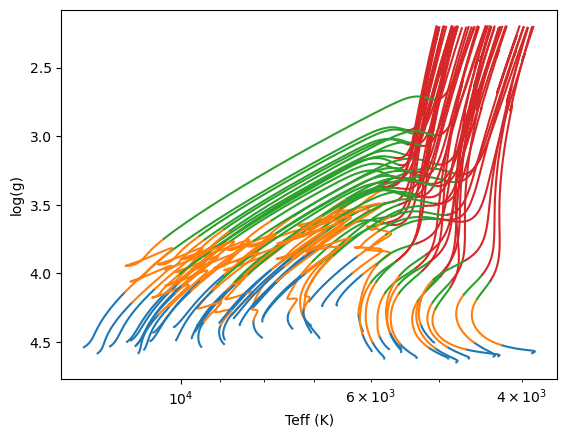

In [22]:
fig, ax = plt.subplots()

for idx, group in grid.loc[mask].groupby(["track", "phase"], sort=False):
    label = None
    c = f"C{idx[1]}"
    ax = group.plot(x="Teff", y="log_g", c=c, ax=ax, label=label)
#     ax.text(group.Teff.iloc[0], group.luminosity.iloc[0], idx[0])

ax.invert_xaxis()
ax.invert_yaxis()
ax.set_xscale("log")
ax.set_xlabel("Teff (K)")
ax.set_ylabel("log(g)")
# ax.legend(title="M, Yinit, Zinit, amlt")
ax.get_legend().remove()

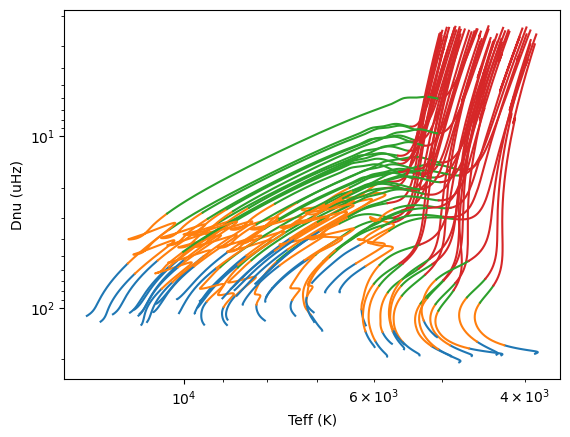

In [34]:
fig, ax = plt.subplots()

for idx, group in grid.loc[mask].groupby(["track", "phase"], sort=False):
    label = None
    c = f"C{idx[1]}"
    ax = group.plot(x="Teff", y="Dnu_freq_o", c=c, ax=ax, label=label)
#     ax.text(group.Teff.iloc[0], group.luminosity.iloc[0], idx[0])

ax.invert_xaxis()
ax.invert_yaxis()
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Teff (K)")
ax.set_ylabel("Dnu (uHz)")
# ax.legend(title="M, Yinit, Zinit, amlt")
ax.get_legend().remove()

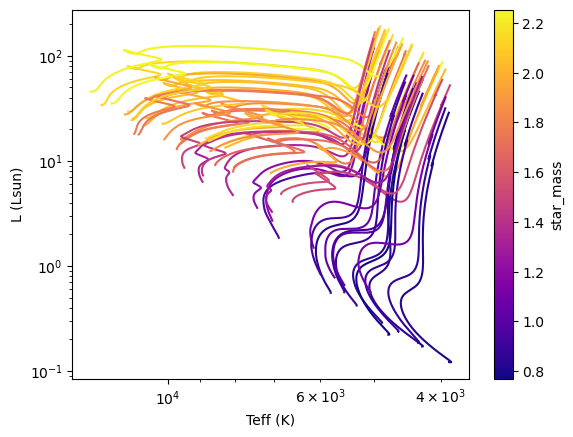

In [25]:
fig, ax = plt.subplots()
# cmap = cmc.batlow
cmap = cm.plasma
colorby = "star_mass"

vmin, vmax = grid.loc[mask, colorby].min(), grid.loc[mask, colorby].max()
norm = Normalize(vmin=vmin, vmax=vmax)

for idx, group in grid.loc[mask].groupby("track", sort=False):
    label = None
    c = cmap(
        norm(group[colorby].iloc[0])
    )
    ax = group.plot(x="Teff", y="luminosity", c=c, ax=ax, label=label)

ax.invert_xaxis()
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Teff (K)")
ax.set_ylabel("L (Lsun)")
# ax.legend(title="M, Yinit, Zinit, amlt")
ax.get_legend().remove()

mappable = cm.ScalarMappable(norm=norm, cmap=cmap)
fig.colorbar(mappable, ax=ax, label=colorby)

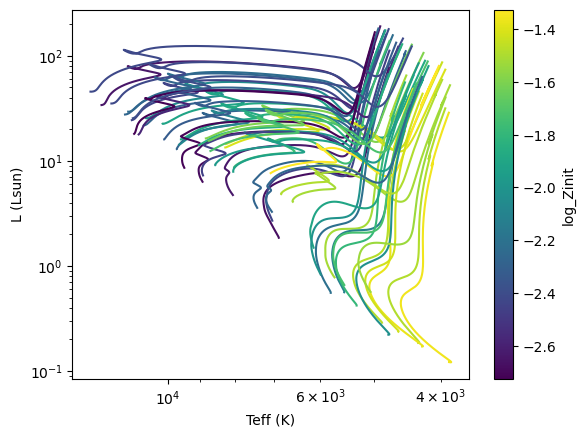

In [26]:
fig, ax = plt.subplots()
# cmap = cmc.hawaii
cmap = cm.viridis
colorby = "log_Zinit"

vmin, vmax = grid.loc[mask, colorby].min(), grid.loc[mask, colorby].max()
norm = Normalize(vmin=vmin, vmax=vmax)

for idx, group in grid.loc[mask].groupby("track", sort=False):
    label = None
    c = cmap(
        norm(group[colorby].iloc[0])
    )
    ax = group.plot(x="Teff", y="luminosity", c=c, ax=ax, label=label)

ax.invert_xaxis()
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Teff (K)")
ax.set_ylabel("L (Lsun)")
# ax.legend(title="M, Yinit, Zinit, amlt")
ax.get_legend().remove()

mappable = cm.ScalarMappable(norm=norm, cmap=cmap)
fig.colorbar(mappable, ax=ax, label=colorby)

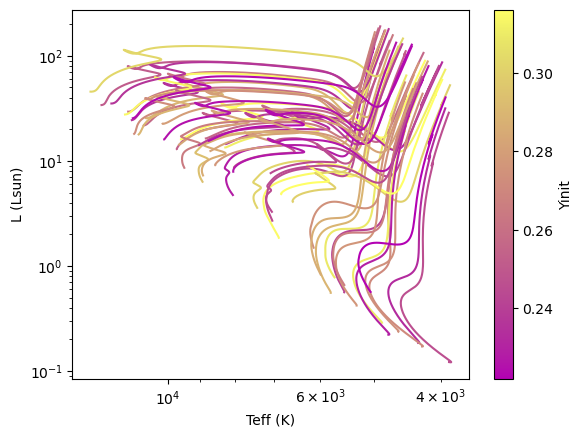

In [27]:
fig, ax = plt.subplots()
# cmap = cmc.buda
cmap = cmc.buda
colorby = "Yinit"

vmin, vmax = grid.loc[mask, colorby].min(), grid.loc[mask, colorby].max()
norm = Normalize(vmin=vmin, vmax=vmax)

for idx, group in grid.loc[mask].groupby("track", sort=False):
    label = None
    c = cmap(
        norm(group[colorby].iloc[0])
    )
    ax = group.plot(x="Teff", y="luminosity", c=c, ax=ax, label=label)

ax.invert_xaxis()
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Teff (K)")
ax.set_ylabel("L (Lsun)")
# ax.legend(title="M, Yinit, Zinit, amlt")
ax.get_legend().remove()

mappable = cm.ScalarMappable(norm=norm, cmap=cmap)
fig.colorbar(mappable, ax=ax, label=colorby)

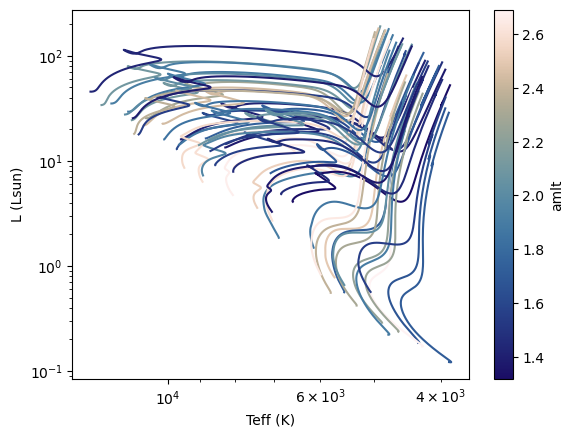

In [28]:
fig, ax = plt.subplots()
cmap = cmc.lapaz
colorby = "amlt"

vmin, vmax = grid.loc[mask, colorby].min(), grid.loc[mask, colorby].max()
norm = Normalize(vmin=vmin, vmax=vmax)

for idx, group in grid.loc[mask].groupby("track", sort=False):
    label = None
    c = cmap(
        norm(group[colorby].iloc[0])
    )
    ax = group.plot(x="Teff", y="luminosity", c=c, ax=ax, label=label)

ax.invert_xaxis()
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Teff (K)")
ax.set_ylabel("L (Lsun)")
# ax.legend(title="M, Yinit, Zinit, amlt")
ax.get_legend().remove()

mappable = cm.ScalarMappable(norm=norm, cmap=cmap)
fig.colorbar(mappable, ax=ax, label=colorby)

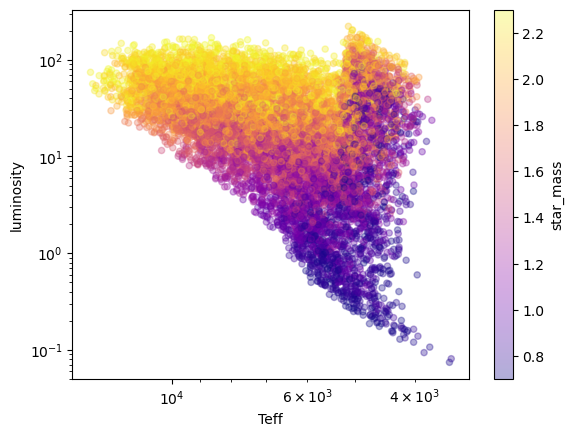

In [29]:
ax = grid.sample(num_samples).plot(x="Teff", y="luminosity", c="star_mass", 
                                   cmap=cm.plasma, kind="scatter", alpha=0.33)
ax.set_xscale("log")
ax.set_yscale("log")
ax.invert_xaxis()

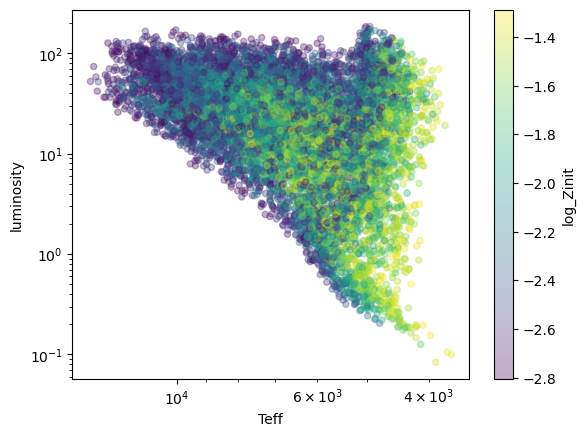

In [30]:
ax = grid.sample(num_samples).plot(x="Teff", y="luminosity", c="log_Zinit", 
                                   cmap=cm.viridis, kind="scatter", alpha=0.33)
ax.set_xscale("log")
ax.set_yscale("log")
ax.invert_xaxis()

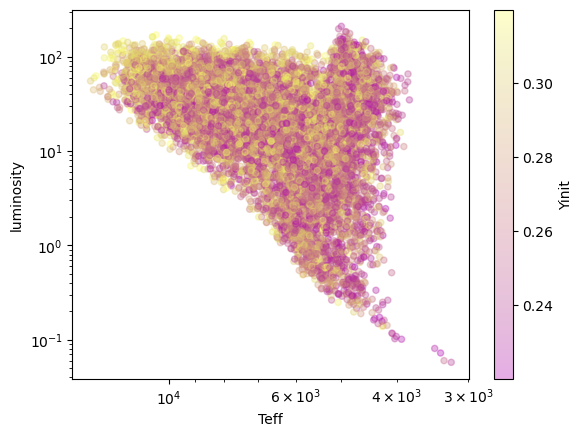

In [31]:
ax = grid.sample(num_samples).plot(x="Teff", y="luminosity", c="Yinit", 
                                   cmap=cmc.buda, kind="scatter", alpha=0.33)
ax.set_xscale("log")
ax.set_yscale("log")
ax.invert_xaxis()

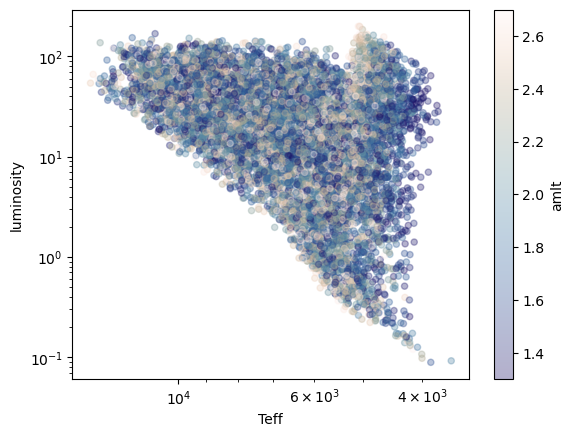

In [32]:
ax = grid.sample(num_samples).plot(x="Teff", y="luminosity", c="amlt", 
                                   cmap=cmc.lapaz, kind="scatter", alpha=0.33)
ax.set_xscale("log")
ax.set_yscale("log")
ax.invert_xaxis()

Modify Beta parameters in Adam to be very close to 1.

BP - RP cut for.